In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [8]:
df = pd.read_csv("seattle-weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [9]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [10]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [11]:
X=df.iloc[:,:-1]

In [12]:
y=df.iloc[:,-1]

In [13]:
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df

,date,precipitation,temp_max,temp_min,wind,weather,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1,5
...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,12,27
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,12,28
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,12,29
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,12,30


In [14]:
print(df['weather'].unique())

['drizzle' 'rain' 'sun' 'snow' 'fog']


In [20]:
X=df[['precipitation','temp_max','temp_min','wind','month','day']]
y=df['weather']

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['weather']=le.fit_transform(df['weather'])
df

,date,precipitation,temp_max,temp_min,wind,weather,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,0,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,2,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,2,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,2,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,2,1,5
...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2,12,27
1457,2015-12-28,1.5,5.0,1.7,1.3,2,12,28
1458,2015-12-29,0.0,7.2,0.6,2.6,1,12,29
1459,2015-12-30,0.0,5.6,-1.0,3.4,4,12,30


In [22]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=32)
print(x_train.shape)
print(y_test.shape)

(1022, 6)
(439,)


In [24]:
rf_model=RandomForestClassifier(n_estimators=3,max_depth=3,random_state=42)
rf_model.fit(x_train,y_train)
print(rf_model.classes_)

['drizzle' 'fog' 'rain' 'snow' 'sun']


In [25]:
y_pred=rf_model.predict(x_test)
y_pred

array(['rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun',
       'rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'sun',
       'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'sun',
       'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun',
       'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun', 'rain', 'rain',
       'rain', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun

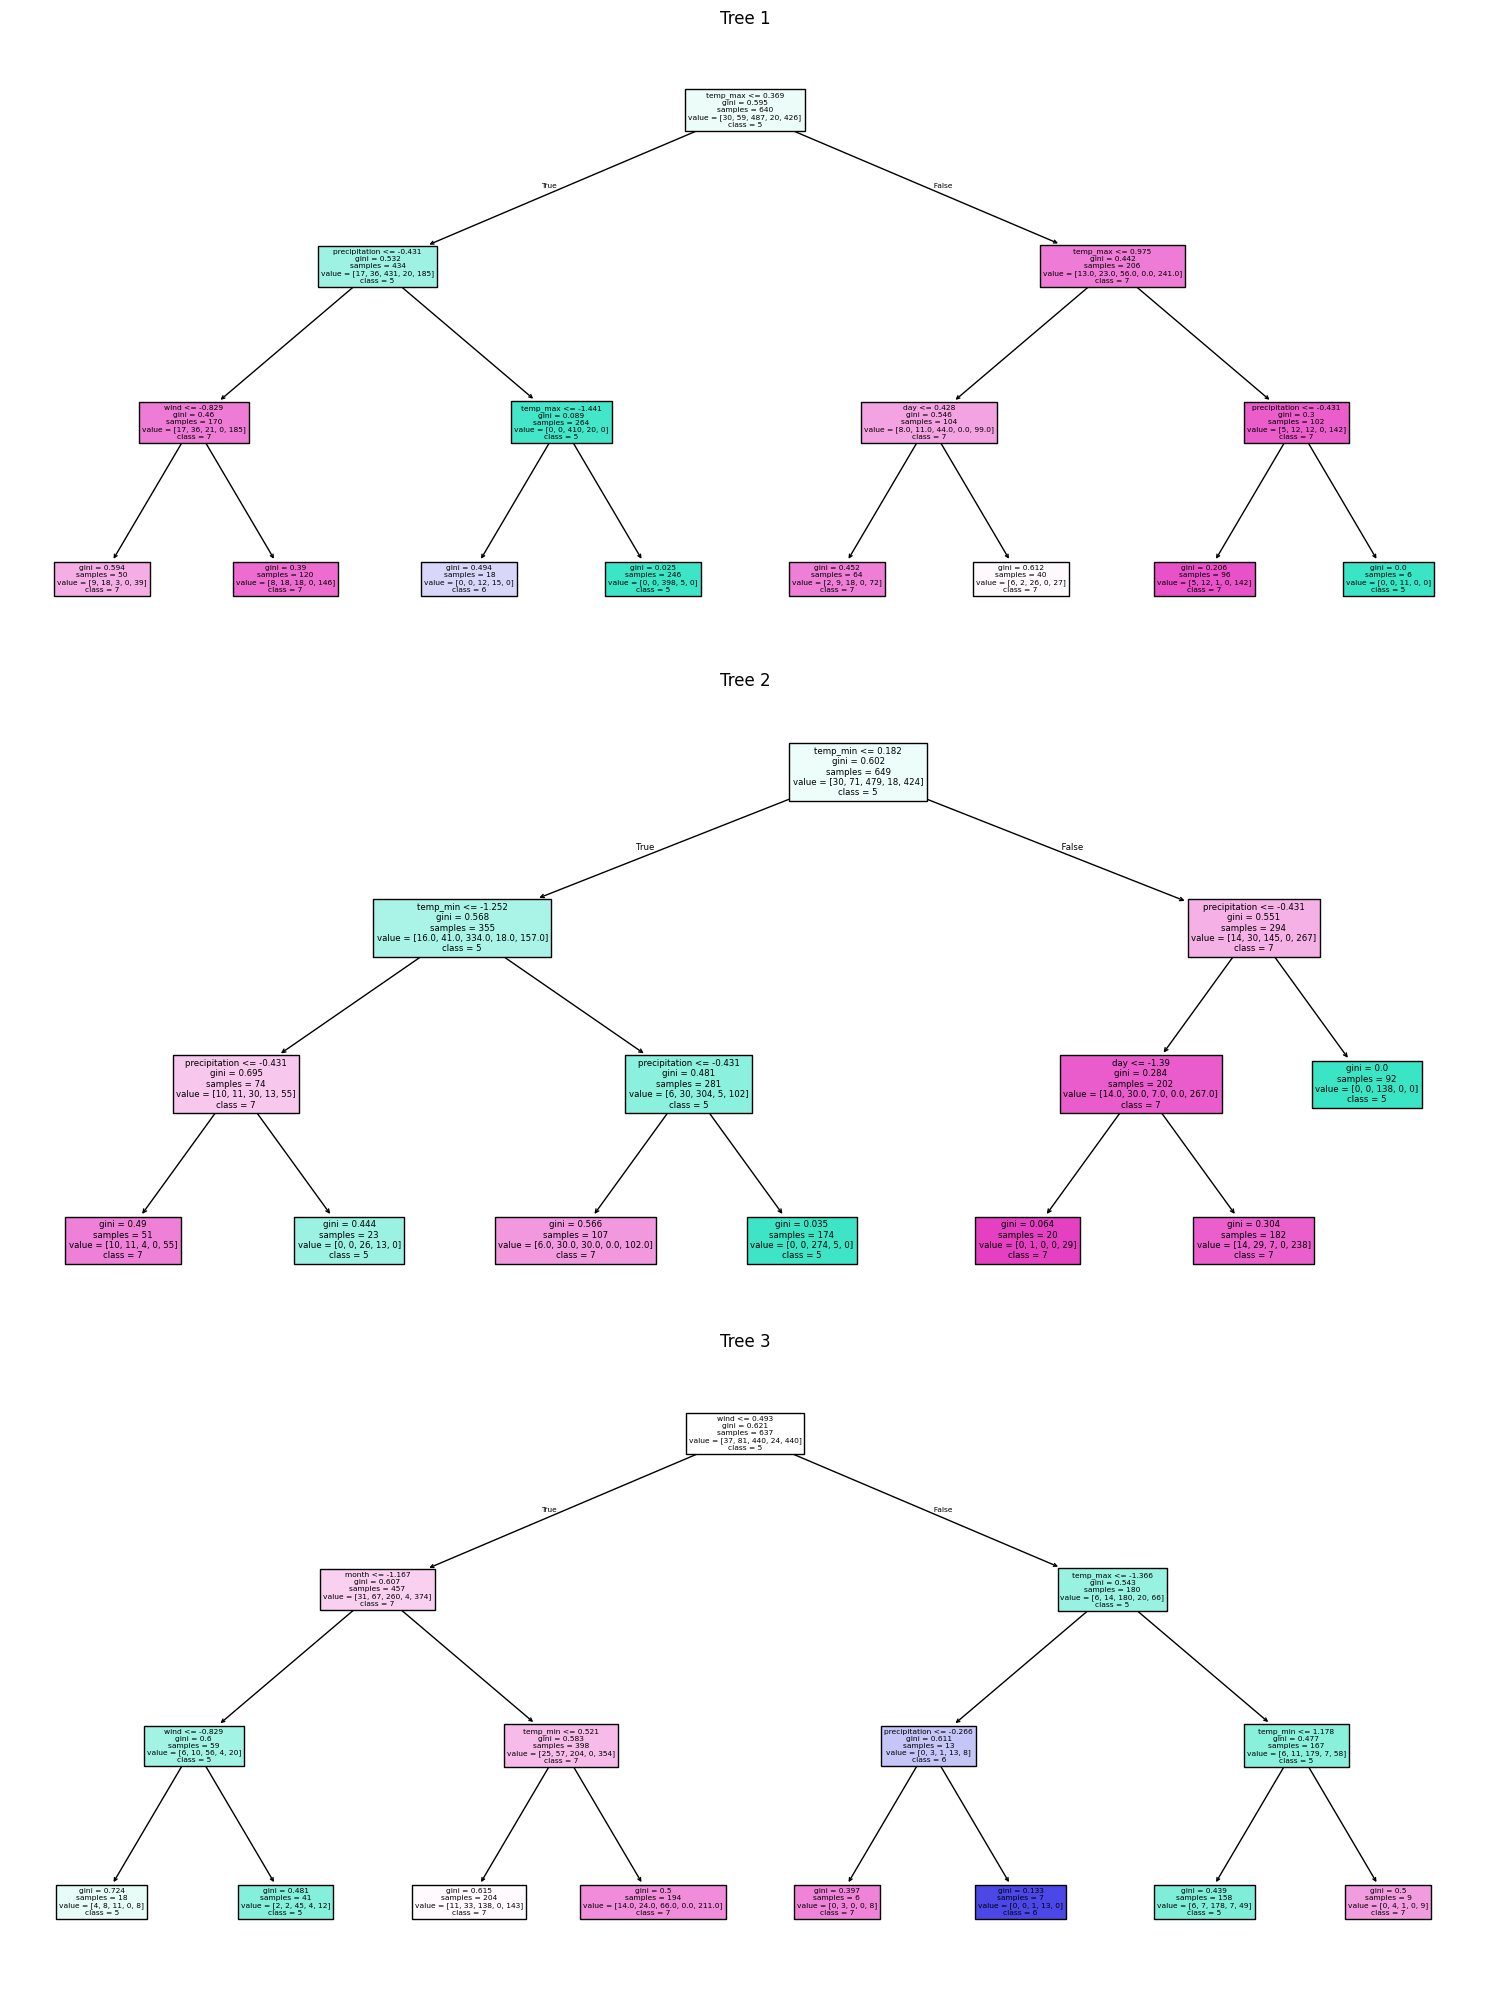

In [26]:
num_tree_to_plot=3
plt.figure(figsize=(15,20))
for i in range(num_tree_to_plot):
    plt.subplot(num_tree_to_plot,1,i+1)

    plot_tree(rf_model.estimators_[i],feature_names=X.columns,class_names=["3","4","5","6","7","8"],filled=True)
    plt.title(f"Tree {i+1}")
plt.tight_layout()
plt.show()

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [28]:
svm_model=SVC(kernel="linear",random_state=42)
svm_model.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [29]:
y_pred=svm_model.predict(x_test)

In [30]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8018223234624146

In [31]:
report=classification_report(y_test,y_pred)
print("classication_report:",report)

classication_report:               precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        22
         fog       0.00      0.00      0.00        28
        rain       0.97      0.82      0.89       178
        snow       1.00      0.17      0.29         6
         sun       0.71      1.00      0.83       205

    accuracy                           0.80       439
   macro avg       0.54      0.40      0.40       439
weighted avg       0.74      0.80      0.75       439



C:\Users\DEVIKA K\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DEVIKA K\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DEVIKA K\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war